# importing Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import joblib
from tkinter import *
from tkinter import messagebox

# Importing CSV To Python

In [2]:
df = pd.read_csv('Admission Chance.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          397 non-null    float64
 2   TOEFL Score        383 non-null    float64
 3   University Rating  400 non-null    int64  
 4    SOP               379 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.3 KB


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,NaN,3.0,8.21,0,0.65


# Check For Missing Value

In [3]:
df.isna().sum()

Serial No             0
GRE Score             3
TOEFL Score          17
University Rating     0
 SOP                 21
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

# Replace Missing Value with Mean

In [4]:
df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(), inplace=True)
df[' SOP'].fillna(df[' SOP'].mean(), inplace=True)

C:\Users\shera\AppData\Local\Temp\ipykernel_8224\3672466597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
C:\Users\shera\AppData\Local\Temp\ipykernel_8224\3672466597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [5]:
df.isna().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Check Heat Map

<Axes: >

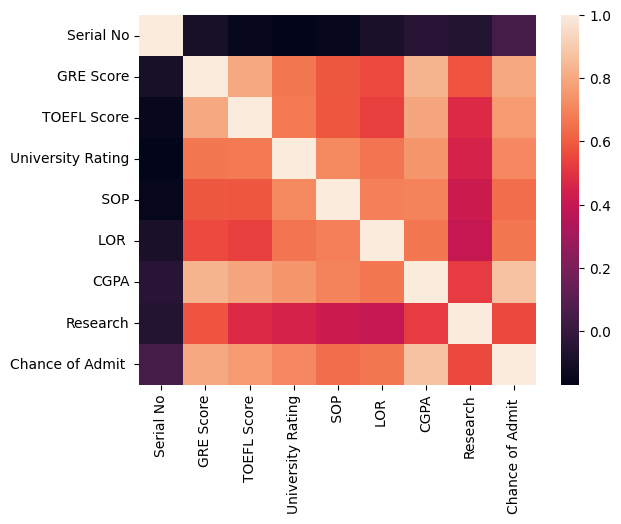

In [6]:
sns.heatmap(df.corr())

# Drop Data With No Correlation

In [7]:
df = df.drop(['Serial No'], axis = 1)

# Standarisasi

In [8]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.761834     1.788633           0.798829  1.122847  1.167321  1.764818   
1   0.627075    -0.093363           0.798829  0.598759  1.167321  0.455151   
2  -0.071239    -0.606634          -0.076600 -0.449415  0.052933 -1.005631   
3   0.452497     0.419909          -0.076600  0.074672 -1.061454  0.119339   
4  -0.245817    -0.777725          -0.952029  0.000000 -0.504260 -0.653029   

   Research  
0  0.909112  
1  0.909112  
2  0.909112  
3  0.909112  
4 -1.099975  


# Data Splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Regression)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
y_pred_gr = gr.predict(X_test)


# Evaluate Model (Regression)

In [11]:
Score_lr = metrics.r2_score(y_test,y_pred_lr)
Score_svr = metrics.r2_score(y_test,y_pred_svm)
Score_rf = metrics.r2_score(y_test,y_pred_rf)
Score_gr = metrics.r2_score(y_test,y_pred_gr)

In [12]:
final_data = pd.DataFrame({'Models': ['LR', 'SVR', 'RF', 'GR'], 'R2_SCORE': [Score_lr, Score_svr, Score_rf, Score_gr]})
final_data

,Models,R2_SCORE
0,LR,0.819739
1,SVR,0.627900
2,RF,0.802256
3,GR,0.800075


<Axes: xlabel='Models', ylabel='R2_SCORE'>

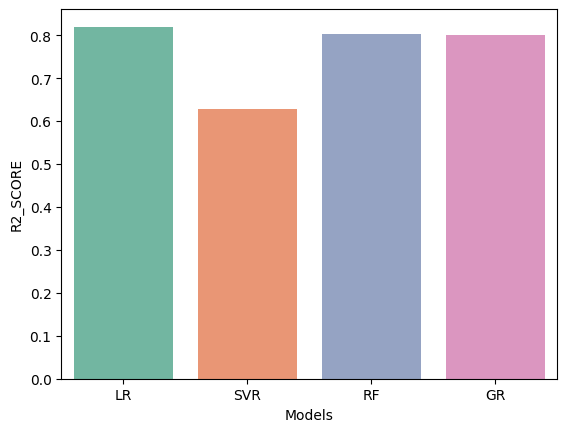

In [13]:
custom_palette = sns.color_palette("Set2", 4)

sns.barplot(x='Models', y='R2_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


We Can See That Linear Regression is the best model to use 

# Model Training (Clasification)

In [14]:
y_train = [1 if value>0.7 else 0 for value in y_train]
y_test = [1 if value>0.7 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_1= lr.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_2 = svm.predict(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_3 = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_4 = rf.predict(X_test)

gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_5 = gr.predict(X_test)


C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Model (Clasification)


In [16]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'RF', 'GBC'],
    'ACC_SCORE': [accuracy_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_2),
                  accuracy_score(y_test, y_pred_3), accuracy_score(y_test, y_pred_4),
                  accuracy_score(y_test, y_pred_5)],
    'RECALL_SCORE': [recall_score(y_test, y_pred_1), recall_score(y_test, y_pred_2),
                     recall_score(y_test, y_pred_3), recall_score(y_test, y_pred_4),
                     recall_score(y_test, y_pred_5)],
    'PRECISION_SCORE': [precision_score(y_test, y_pred_1), precision_score(y_test, y_pred_2),
                        precision_score(y_test, y_pred_3), precision_score(y_test, y_pred_4),
                        precision_score(y_test, y_pred_5)]
})

final_data

,Models,ACC_SCORE,RECALL_SCORE,PRECISION_SCORE
0,LR,0.8000,0.872340,0.803922
1,SVC,0.7500,1.000000,0.701493
2,KNN,0.8375,0.872340,0.854167
3,RF,0.8500,0.872340,0.872340
4,GBC,0.8375,0.893617,0.840000


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

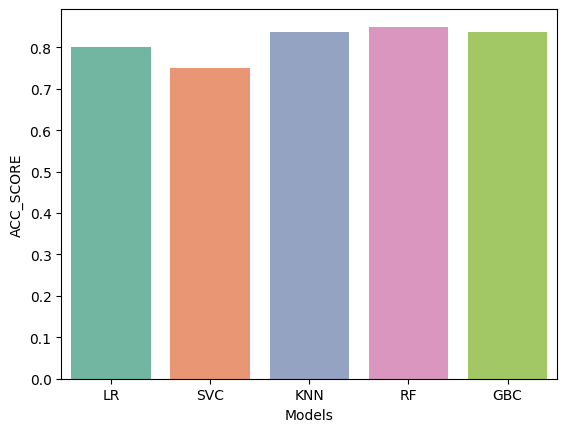

In [17]:
custom_palette = sns.color_palette("Set2", 5)

sns.barplot(x='Models', y='ACC_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


Random Forest (RF) is the best model to use

# Saving Model

In [18]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
gr = GradientBoostingClassifier()
gr.fit(X,y)

GradientBoostingClassifier()

In [19]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [20]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [21]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
svm = SVC()
svm.fit(X,y)

SVC()

In [22]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [23]:
joblib.dump(svm,'admission_model')
model = joblib.load('admission_model')
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

# GUI

In [25]:
joblib.dump(lr,'model_lr')
model_lr = joblib.load('model_lr')

In [26]:
joblib.dump(svm,'model_svm')
model_svm = joblib.load('model_svm')

In [27]:
joblib.dump(knn,'model_knn')
model_knn = joblib.load('model_knn')

In [28]:
joblib.dump(rf,'model_rf')
model_rf = joblib.load('model_rf')

In [29]:
joblib.dump(gr,'model_gr')
model_gr = joblib.load('model_gr')

In [30]:
print(f'Hasil Lr : ', model_lr.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))
print(f'Hasil Svm : ', model_svm.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))
print(f'Hasil KNN : ', model_knn.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))
print(f'Hasil RF : ', model_rf.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))
print(f' Hasil gr : ', model_gr.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]])))


Hasil Lr :  [1]
Hasil Svm :  [1]
Hasil KNN :  [1]
Hasil RF :  [1]
 Hasil gr :  [1]


C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shera\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import tkinter as tk

# Load the models
model_dict = {
    "Logistic Regression": joblib.load('model_lr'),
    "SVM": joblib.load('model_svm'),
    "KNN": joblib.load('model_knn'),
    "Random Forest": joblib.load('model_rf'),
    "Gradient Boosting": joblib.load('model_gr')
}

# Function to validate input
def validate_input(event):
    entry_ranges = {
        e1: (260, 340), 
        e2: (0, 120),     
        e3: (1, 5),     
        e4: (1, 5),       
        e5: (1, 5),       
        e6: (0, 10),     
        e7: (0, 1)       
    }
    
    try:
        min_value, max_value = entry_ranges[event.widget]
        value = float(event.widget.get())
        
        if not (min_value <= value <= max_value):
            raise ValueError
        
    except ValueError:
        messagebox.showerror("Error", f"Please enter a valid number between {min_value} and {max_value}.")
        event.widget.delete(0, tk.END)

# Function to show entry
def show_entry():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())

        selected_model = model_var.get()
        
        model = model_dict[selected_model]
        
        result = model.predict(sc.transform([[p1, p2, p3, p4, p5, p6, p7]]))
        
        if result == 1:
            result_label.config(text="High Chance of getting admission !!", fg="green")
        else:
            result_label.config(text="Low Chance of Admission !!", fg="red")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create main window
master = tk.Tk()
master.title("Graduate Admission Analysis and Prediction")

master.configure(bg="#ffffcc")
master.geometry("400x350")

header_label = tk.Label(master, text="Graduate Admission Prediction", font=("Arial", 16), bg="#ffffcc", fg="#333")
header_label.grid(row=0, columnspan=2, pady=10)

input_frame = tk.Frame(master, bg="#ffffcc")
input_frame.grid(row=1, columnspan=2, pady=10)

tk.Label(input_frame, text="GRE Score (260-340):", bg="#ffffcc").grid(row=0, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="TOEFL Score (0-120):", bg="#ffffcc").grid(row=1, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="University Rating (1-5):", bg="#ffffcc").grid(row=2, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="SOP (1-5):", bg="#ffffcc").grid(row=3, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="LOR (1-5):", bg="#ffffcc").grid(row=4, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="CGPA (0-10):", bg="#ffffcc").grid(row=5, column=0, padx=5, sticky="e")
tk.Label(input_frame, text="Research (0/1):", bg="#ffffcc").grid(row=6, column=0, padx=5, sticky="e")

e1 = tk.Entry(input_frame)
e2 = tk.Entry(input_frame)
e3 = tk.Entry(input_frame)
e4 = tk.Entry(input_frame)
e5 = tk.Entry(input_frame)
e6 = tk.Entry(input_frame)
e7 = tk.Entry(input_frame)

e1.grid(row=0, column=1, padx=5)
e2.grid(row=1, column=1, padx=5)
e3.grid(row=2, column=1, padx=5)
e4.grid(row=3, column=1, padx=5)
e5.grid(row=4, column=1, padx=5)
e6.grid(row=5, column=1, padx=5)
e7.grid(row=6, column=1, padx=5)

for entry in (e1, e2, e3, e4, e5, e6, e7):
    entry.bind("<FocusOut>", validate_input)

model_var = tk.StringVar(master)
model_var.set("Logistic Regression") 

model_options = ["Logistic Regression", "SVM", "KNN", "Random Forest", "Gradient Boosting"]
model_menu = tk.OptionMenu(master, model_var, *model_options)
model_menu.grid(row=7, columnspan=2, pady=10)

predict_button = tk.Button(master, text="Predict", command=show_entry, bg="#4CAF50", fg="white", font=("Arial", 12))
predict_button.grid(row=8, column=0, columnspan=2, pady=10)

result_label = tk.Label(master, text="", font=("Arial", 14), bg="#ffffcc")
result_label.grid(row=9, columnspan=2)

master.mainloop()
